<a href="https://colab.research.google.com/github/Euchigere/Building-a-Conversational-Chatbot-for-Slack-using-Rasa-and-Python/blob/master/MNIST_Project_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# MNIST data set
mnist = tf.keras.datasets.mnist

# import python libraries
import matplotlib.pyplot as plt
import numpy as np
import random as ran

TensorFlow 2.x selected.


In [3]:
# loading mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing inputs
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print('The total number of data sets: {}'.format(len(x_train) + len(x_test)))
print('The number of train data sets: {}'.format(len(x_train)))
print('The number of test data sets: {}'.format(len(x_test)))

print('\nThe shape of x_train: {}'.format(x_train.shape))
print('The shape of y_train: {}'.format(y_train.shape))

The total number of data sets: 70000
The number of train data sets: 60000
The number of test data sets: 10000

The shape of x_train: (60000, 28, 28)
The shape of y_train: (60000,)


In [0]:
# function to display random digit with label
def display_digit():
  num = ran.randint(0, x_train.shape[0])
  print(y_train[num])
  label = y_train[num]
  digit = x_train[num]
  plt.title('Example: {} Label: {}'.format(num, label))
  plt.imshow(digit, cmap=plt.get_cmap('gray_r'))
  plt.show()

2


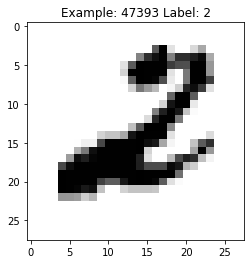

In [6]:
# Display random digits
display_digit()

In [0]:
#Building model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(x_train, y_train, batch_size=500, epochs=10,
                    validation_data=(x_test, y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.0911 - accuracy: 0.9737 - val_loss: 0.0866 - val_accuracy: 0.9739
Epoch 2/10
60000/60000 - 1s - loss: 0.0844 - accuracy: 0.9751 - val_loss: 0.0819 - val_accuracy: 0.9755
Epoch 3/10
60000/60000 - 1s - loss: 0.0789 - accuracy: 0.9769 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 - 1s - loss: 0.0739 - accuracy: 0.9779 - val_loss: 0.0762 - val_accuracy: 0.9758
Epoch 5/10
60000/60000 - 1s - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0763 - val_accuracy: 0.9766
Epoch 6/10
60000/60000 - 1s - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 7/10
60000/60000 - 1s - loss: 0.0613 - accuracy: 0.9819 - val_loss: 0.0722 - val_accuracy: 0.9780
Epoch 8/10
60000/60000 - 1s - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.0700 - val_accuracy: 0.9784
Epoch 9/10
60000/60000 - 1s - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 10/10
60

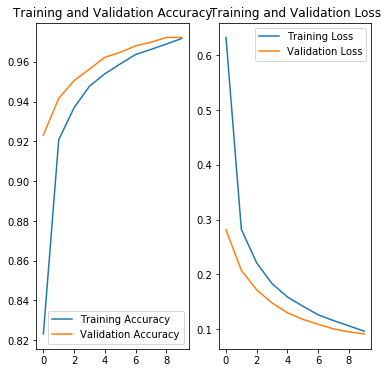

In [61]:
# visualise training results
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [62]:
#extracticting predicted labels
logits = model(x_test)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
label_pred = prediction.numpy()
real_label = y_test


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Text(33.0, 0.5, 'Predicted Label')

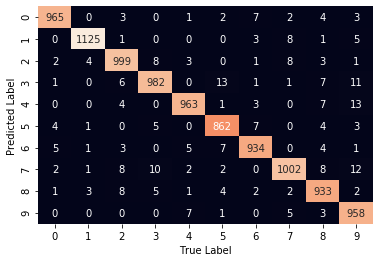

In [69]:
#plotting confusion matrix
mat = confusion_matrix(real_label, label_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,)
            # xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [73]:
mat.T

array([[ 965,    0,    3,    0,    1,    2,    7,    2,    4,    3],
       [   0, 1125,    1,    0,    0,    0,    3,    8,    1,    5],
       [   2,    4,  999,    8,    3,    0,    1,    8,    3,    1],
       [   1,    0,    6,  982,    0,   13,    1,    1,    7,   11],
       [   0,    0,    4,    0,  963,    1,    3,    0,    7,   13],
       [   4,    1,    0,    5,    0,  862,    7,    0,    4,    3],
       [   5,    1,    3,    0,    5,    7,  934,    0,    4,    1],
       [   2,    1,    8,   10,    2,    2,    0, 1002,    8,   12],
       [   1,    3,    8,    5,    1,    4,    2,    2,  933,    2],
       [   0,    0,    0,    0,    7,    1,    0,    5,    3,  958]])

In [0]:
#Trying out example in class
import pandas as pd

sample_data = {'x1': (3, 5, 10),
               'x2': (5, 1, 2),
               'y': (75, 82, 93)}

In [0]:
df = pd.DataFrame(sample_data)

In [0]:
df

,x1,x2,y
0,3,5,75
1,5,1,82
2,10,2,93


In [0]:
X = df.loc[:, ['x1', 'x2']].values
y = df.loc[:, 'y'].values

In [0]:
print(X, '\nThe shape of X is: {}\n'.format(X.shape))
print(y, '\nThe shape of y is: {}'.format(y.shape))

[[ 3  5]
 [ 5  1]
 [10  2]] 
The shape of X is: (3, 2)

[75 82 93] 
The shape of y is: (3,)


In [0]:
#Building model
sample_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, kernel_initializer='normal', input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
])

sample_model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['mean_absolute_error'])

In [0]:
sample_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [0]:
sample_model.fit(X, y, epochs=100, verbose=2)

Train on 3 samples
Epoch 1/100
3/3 - 0s - loss: 83.2173 - mean_absolute_error: 83.2173
Epoch 2/100
3/3 - 0s - loss: 83.2132 - mean_absolute_error: 83.2132
Epoch 3/100
3/3 - 0s - loss: 83.2090 - mean_absolute_error: 83.2090
Epoch 4/100
3/3 - 0s - loss: 83.2048 - mean_absolute_error: 83.2048
Epoch 5/100
3/3 - 0s - loss: 83.2004 - mean_absolute_error: 83.2004
Epoch 6/100
3/3 - 0s - loss: 83.1960 - mean_absolute_error: 83.1960
Epoch 7/100
3/3 - 0s - loss: 83.1916 - mean_absolute_error: 83.1916
Epoch 8/100
3/3 - 0s - loss: 83.1870 - mean_absolute_error: 83.1870
Epoch 9/100
3/3 - 0s - loss: 83.1824 - mean_absolute_error: 83.1824
Epoch 10/100
3/3 - 0s - loss: 83.1777 - mean_absolute_error: 83.1777
Epoch 11/100
3/3 - 0s - loss: 83.1729 - mean_absolute_error: 83.1729
Epoch 12/100
3/3 - 0s - loss: 83.1680 - mean_absolute_error: 83.1680
Epoch 13/100
3/3 - 0s - loss: 83.1630 - mean_absolute_error: 83.1630
Epoch 14/100
3/3 - 0s - loss: 83.1580 - mean_absolute_error: 83.1580
Epoch 15/100
3/3 - 0s - 